In [1]:
# example of loading a pix2pix model and using it for one-off image translation
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import expand_dims
from matplotlib import pyplot
import cv2

In [2]:

# load an image
def load_image(filename, size=(256,256)):
    # load image with the preferred size
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    # reshape to 1 sample
    pixels = expand_dims(pixels, 0)
    return pixels



# load model
model = load_model('results/pix2pix_g_model_000050.h5')


Loaded (1, 256, 256, 3)


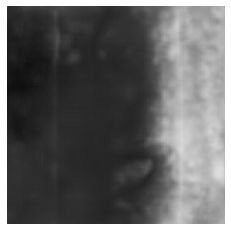

In [3]:
# load source image
src_image = load_image('sketch_test.png')
print('Loaded', src_image.shape)
# generate image from source
gen_image = model.predict(src_image)

# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image

pyplot.imshow(gen_image[0])

pyplot.axis('off')
pyplot.show()